In [1]:
pip install pandas matplotlib seaborn folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import AntPath

In [4]:
data = pd.read_csv('proj3_data.csv')
data

,Datetime,Distance_Covered,Cumulative_Time,Cumulative_Time_for_Segment,Split_Time,Kilometer,Segment_Within_Kilometer,KM_Segment_Indicator,Latitude,Longitude,Altitude,Distance (meters),HeartRate,Speed (m/s),Split Seconds,Split Difference,KM Time,KM Split
0,2020-10-10 10:01:56+00:00,0.000000,0:00:00,0:00:31,0:00:31,1,1,1.1.0,61.499642,23.759591,97.800003,0.00000,123,1.437,31,0,0:04:56,0:04:56
1,2020-10-10 10:01:57+00:00,0.001790,0:00:01,0:00:31,0:00:31,1,1,1.1.0,61.499658,23.759586,97.000000,1.79000,124,1.773,31,0,0:04:56,0:04:56
2,2020-10-10 10:01:58+00:00,0.003530,0:00:02,0:00:31,0:00:31,1,1,1.1.0,61.499674,23.759582,97.599998,3.53000,126,1.773,31,0,0:04:56,0:04:56
3,2020-10-10 10:01:59+00:00,0.005600,0:00:03,0:00:31,0:00:31,1,1,1.1.0,61.499693,23.759588,97.800003,5.60000,127,1.773,31,0,0:04:56,0:04:56
4,2020-10-10 10:02:00+00:00,0.007240,0:00:04,0:00:31,0:00:31,1,1,1.1.0,61.499708,23.759581,98.000000,7.24000,129,1.782,31,0,0:04:56,0:04:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,2020-10-10 11:40:05+00:00,21.269721,1:38:09,1:38:13,0:00:18,22,3,22.3.0,61.492920,23.760966,89.000000,21269.72070,197,4.759,18,-4,1:38:13,0:01:10
5911,2020-10-10 11:40:06+00:00,21.272270,1:38:10,1:38:13,0:00:18,22,3,22.3.0,61.492914,23.761013,89.000000,21272.26953,199,4.460,18,-4,1:38:13,0:01:10
5912,2020-10-10 11:40:07+00:00,21.274369,1:38:11,1:38:13,0:00:18,22,3,22.3.0,61.492915,23.761054,89.000000,21274.36914,198,4.161,18,-4,1:38:13,0:01:10
5913,2020-10-10 11:40:08+00:00,21.275930,1:38:12,1:38:13,0:00:18,22,3,22.3.0,61.492920,23.761081,89.199997,21275.92969,199,3.200,18,-4,1:38:13,0:01:10


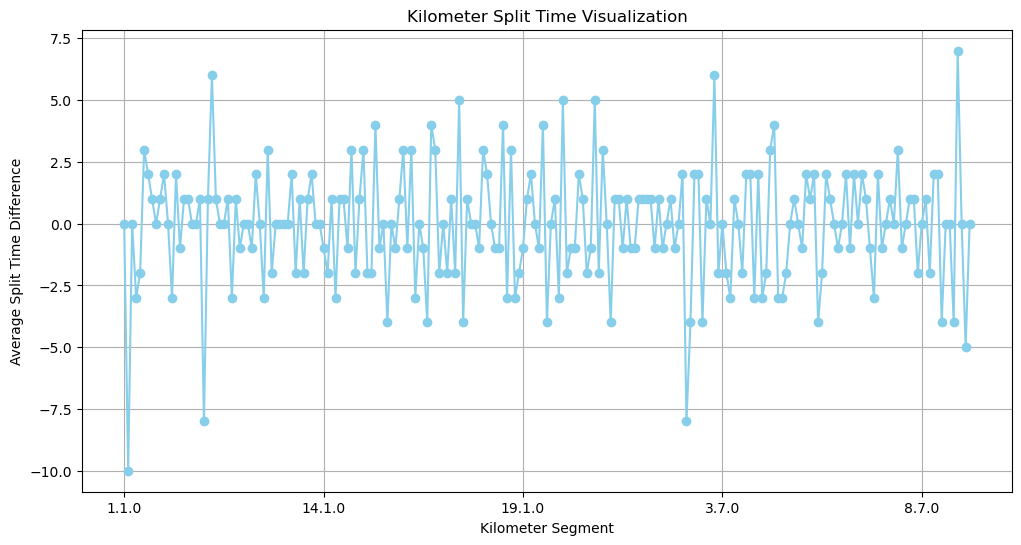

In [5]:
# 1. Kilometer Split Time Visualization
# Group data by kilometer segment and calculate the mean split difference
kilometer_split_avg = data.groupby('KM_Segment_Indicator')['Split Difference'].mean()

# Plotting
plt.figure(figsize=(12, 6))
kilometer_split_avg.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Kilometer Split Time Visualization')
plt.xlabel('Kilometer Segment')
plt.ylabel('Average Split Time Difference')
plt.grid(True)
plt.show()

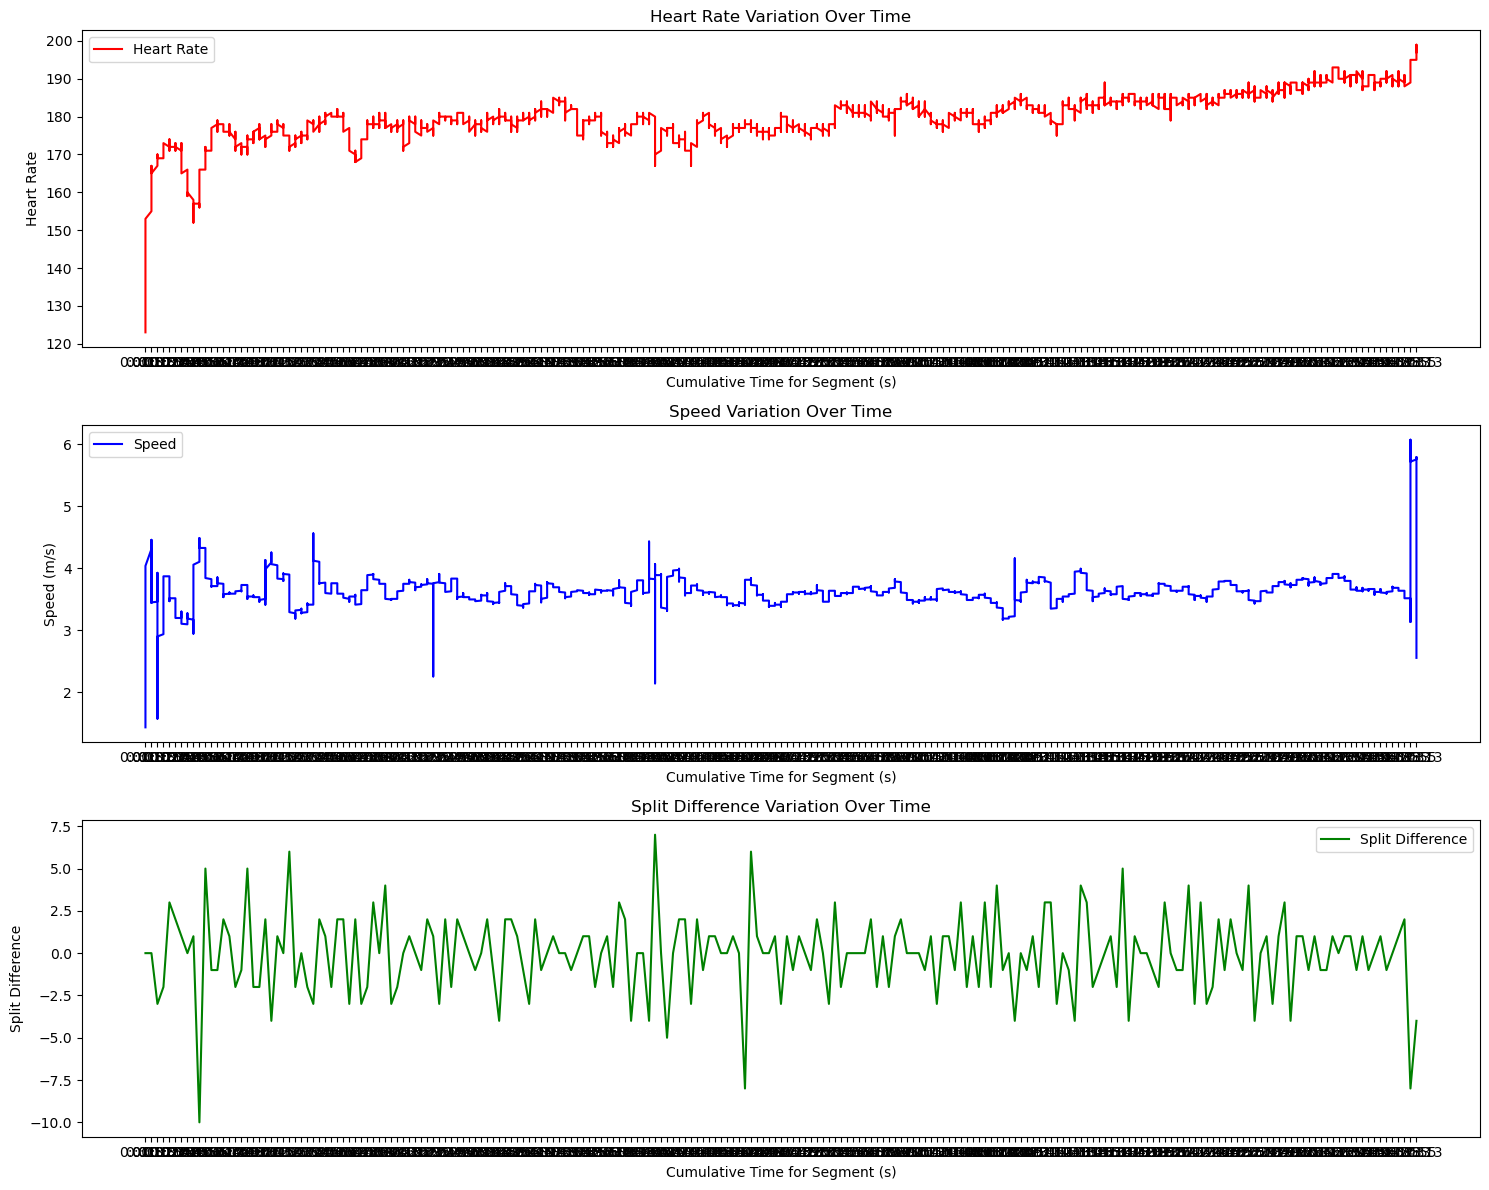

In [6]:
# Set up the figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 12))

# Heart Rate Variation Over Time
axs[0].plot(data['Cumulative_Time_for_Segment'], data['HeartRate'], color='red', label='Heart Rate')
axs[0].set_title('Heart Rate Variation Over Time')
axs[0].set_xlabel('Cumulative Time for Segment (s)')
axs[0].set_ylabel('Heart Rate')
axs[0].legend()

# Speed Variation Over Time
axs[1].plot(data['Cumulative_Time_for_Segment'], data['Speed (m/s)'], color='blue', label='Speed')
axs[1].set_title('Speed Variation Over Time')
axs[1].set_xlabel('Cumulative Time for Segment (s)')
axs[1].set_ylabel('Speed (m/s)')
axs[1].legend()

# Kilometer Time Variation Over Time
axs[2].plot(data['Cumulative_Time_for_Segment'], data['Split Difference'], color='green', label='Split Difference')
axs[2].set_title('Split Difference Variation Over Time')
axs[2].set_xlabel('Cumulative Time for Segment (s)')
axs[2].set_ylabel('Split Difference')
axs[2].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


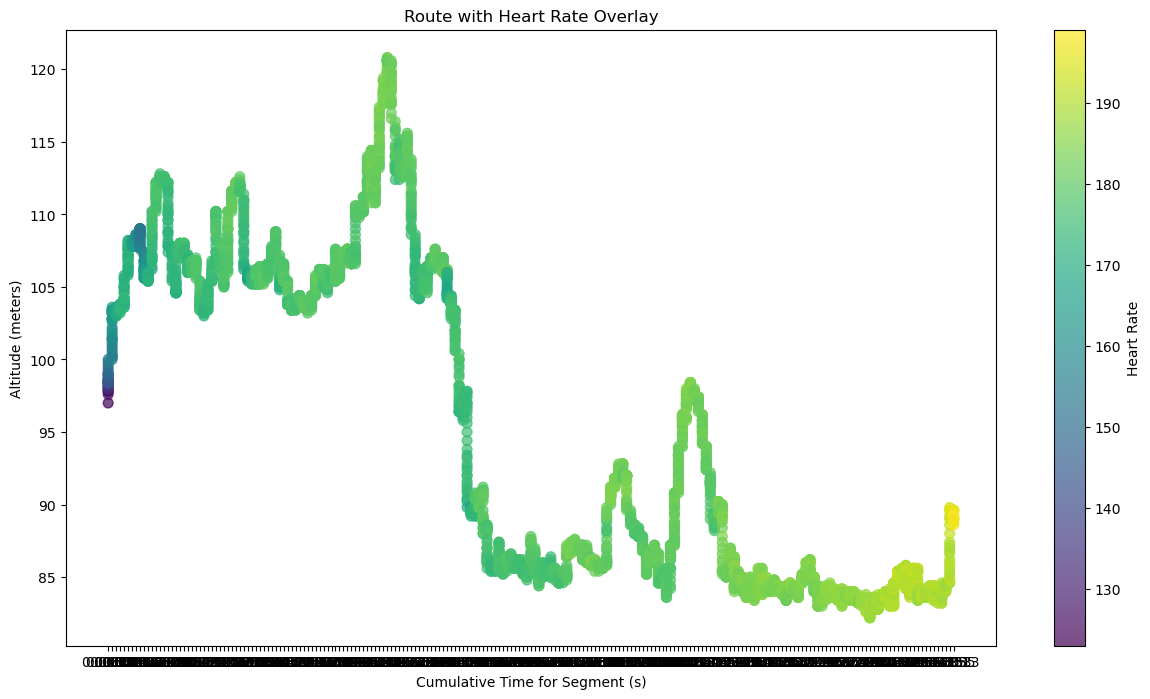

Correlation between Heart Rate and Altitude: -0.47


In [7]:
# 3.Route with heart Rate Overlay
# Scatter Plot of Route with Heart Rate Overlay
plt.figure(figsize=(15, 8))

# Scatter plot with color gradient based on heart rate
sc = plt.scatter(data['Cumulative_Time_for_Segment'], data['Altitude'],
                 c=data['HeartRate'], cmap='viridis', s=50, alpha=0.7)

# Add colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Heart Rate')

# Title and labels
plt.title('Route with Heart Rate Overlay')
plt.xlabel('Cumulative Time for Segment (s)')
plt.ylabel('Altitude (meters)')

# Show the plot
plt.show()

# Correlation between Effort (Heart Rate) and Course Terrain (Altitude)
correlation = data['HeartRate'].corr(data['Altitude'])
print(f"Correlation between Heart Rate and Altitude: {correlation:.2f}")

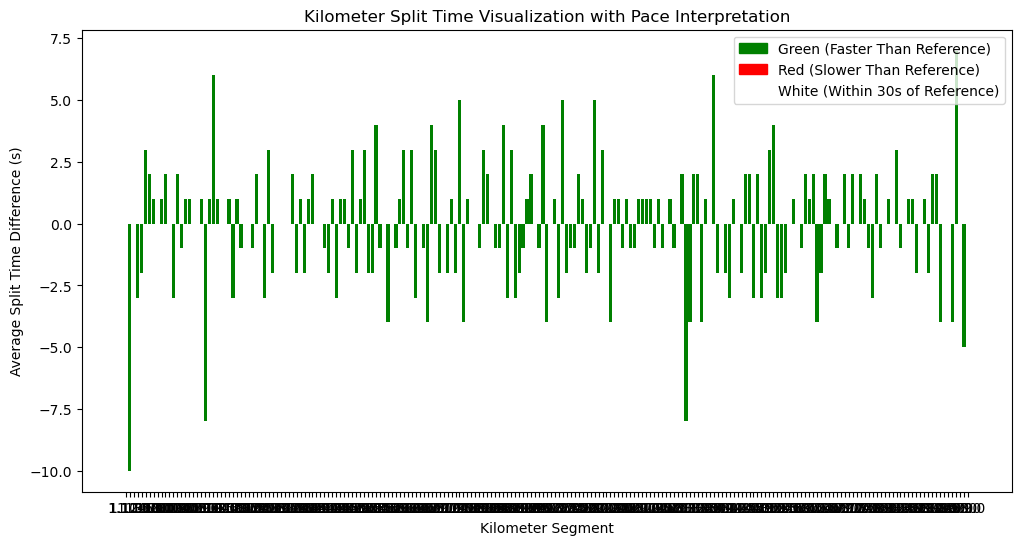

In [10]:
# 4. Kilometers Split Time Visualization with Pace Interpretation

import matplotlib.pyplot as plt
import numpy as np

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(split_times.index, split_times, color=colors)

# Add legend and labels
legend_labels = ['Green (Faster Than Reference)', 'Red (Slower Than Reference)', 'White (Within 30s of Reference)']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['green', 'red', 'white']]
plt.legend(legend_handles, legend_labels, loc='upper right')

plt.title('Kilometer Split Time Visualization with Pace Interpretation')
plt.xlabel('Kilometer Segment')
plt.ylabel('Average Split Time Difference (s)')

# Show the combined plot
plt.show()

